<a href="https://colab.research.google.com/github/ashishlamsal/appliance-energy-prediction/blob/main/appliance_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appliance Energy Prediction


There are 29 features to describe appliances energy use :
1. date : time year-month-day hour:minute:second
2. lights : energy use of light fixtures in the house in Wh
3. T1 : Temperature in kitchen area, in Celsius
4. T2 : Temperature in living room area, in Celsius
5. T3 : Temperature in laundry room area
6. T4 : Temperature in office room, in Celsius
7. T5 : Temperature in bathroom, in Celsius
8. T6 : Temperature outside the building (north side), in Celsius
9. T7 : Temperature in ironing room, in Celsius
10. T8 : Temperature in teenager room 2, in Celsius
11. T9 : Temperature in parents’ room, in Celsius
12. T_out : Temperature outside (from Chievres weather station), in Celsius
13. Tdewpoint : (from Chievres weather station), Â°C
14. RH_1 : Humidity in kitchen area, in %
15. RH_2 : Humidity in living room area, in %
16. RH_3 : Humidity in laundry room area, in %
17. RH_4 : Humidity in office room, in %
18. RH_5 : Humidity in bathroom, in %
19. RH_6 : Humidity outside the building (north side), in %
20. RH_7 : Humidity in ironing room, in %
21. RH_8 : Humidity in teenager room 2, in %
22. RH_9 : Humidity in parents’ room, in %
23. RH_out :Humidity outside (from Chievres weather station), in %
24. Pressure : (from Chievres weather station), in mm Hg
25. Wind speed: (from Chievres weather station), in m/s
26. Visibility :(from Chievres weather station), in km
27. Rv1 :Random variable 1, non-dimensional
28. Rv2 :Random variable 2, non-dimensional
29. Appliances : Total energy used by appliances, in Wh

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


import warnings

warnings.filterwarnings("ignore")

# Loading [Dataset](https://drive.google.com/drive/u/3/folders/1X3m_s3g-NDRZlE-YZun__Xyhy59hWivK)
- Make shortcut of dataset folder in google drive


In [304]:
# mounting your google drive to colab
from google.colab import drive

drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [305]:
# load dataset
path = r"/gdrive/MyDrive/dataset/KAG_energydata.csv"

df = pd.read_csv(path)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.5967,19.2,44.7900,19.79,44.7300,19.0000,...,17.0333,45.53,6.6000,733.5,92.0,7.0000,63.0000,5.3,13.2754,13.2754
1,2016-01-11 17:10:00,60,30,19.89,46.6933,19.2,44.7225,19.79,44.7900,19.0000,...,17.0667,45.56,6.4833,733.6,92.0,6.6667,59.1667,5.2,18.6062,18.6062
2,2016-01-11 17:20:00,50,30,19.89,46.3000,19.2,44.6267,19.79,44.9333,18.9267,...,17.0000,45.50,6.3667,733.7,92.0,6.3333,55.3333,5.1,28.6427,28.6427
3,2016-01-11 17:30:00,50,40,19.89,46.0667,19.2,44.5900,19.79,45.0000,18.8900,...,17.0000,45.40,6.2500,733.8,92.0,6.0000,51.5000,5.0,45.4104,45.4104
4,2016-01-11 17:40:00,60,40,19.89,46.3333,19.2,44.5300,19.79,45.0000,18.8900,...,17.0000,45.40,6.1333,733.9,92.0,5.6667,47.6667,4.9,10.0841,10.0841


# Data Exploration

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [307]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,...,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000,19735.0000
mean,97.6950,3.8019,21.6866,40.2597,20.3412,40.4204,22.2676,39.2425,20.8553,39.0269,...,19.4858,41.5524,7.4117,755.5226,79.7504,4.0398,38.3308,3.7607,24.9880,24.9880
std,102.5249,7.9360,1.6061,3.9793,2.1930,4.0698,2.0061,3.2546,2.0429,4.3413,...,2.0147,4.1515,5.3174,7.3994,14.9011,2.4512,11.7947,4.1946,14.4966,14.4966
min,10.0000,0.0000,16.7900,27.0233,16.1000,20.4633,17.2000,28.7667,15.1000,27.6600,...,14.8900,29.1667,-5.0000,729.3000,24.0000,0.0000,1.0000,-6.6000,0.0053,0.0053
25%,50.0000,0.0000,20.7600,37.3333,18.7900,37.9000,20.7900,36.9000,19.5300,35.5300,...,18.0000,38.5000,3.6667,750.9333,70.3333,2.0000,29.0000,0.9000,12.4979,12.4979
50%,60.0000,0.0000,21.6000,39.6567,20.0000,40.5000,22.1000,38.5300,20.6667,38.4000,...,19.3900,40.9000,6.9167,756.1000,83.6667,3.6667,40.0000,3.4333,24.8977,24.8977
75%,100.0000,0.0000,22.6000,43.0667,21.5000,43.2600,23.2900,41.7600,22.1000,42.1567,...,20.6000,44.3381,10.4083,760.9333,91.6667,5.5000,40.0000,6.5667,37.5838,37.5838
max,1080.0000,70.0000,26.2600,63.3600,29.8567,56.0267,29.2360,50.1633,26.2000,51.0900,...,24.5000,53.3267,26.1000,772.3000,100.0000,14.0000,66.0000,15.5000,49.9965,49.9965


In [308]:
# Checking for null values in all columns
df.isnull().sum().sort_values(ascending=True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

There are no null values in the dataset

In [309]:
df.shape

(19735, 29)

In [310]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

# Data Visualization

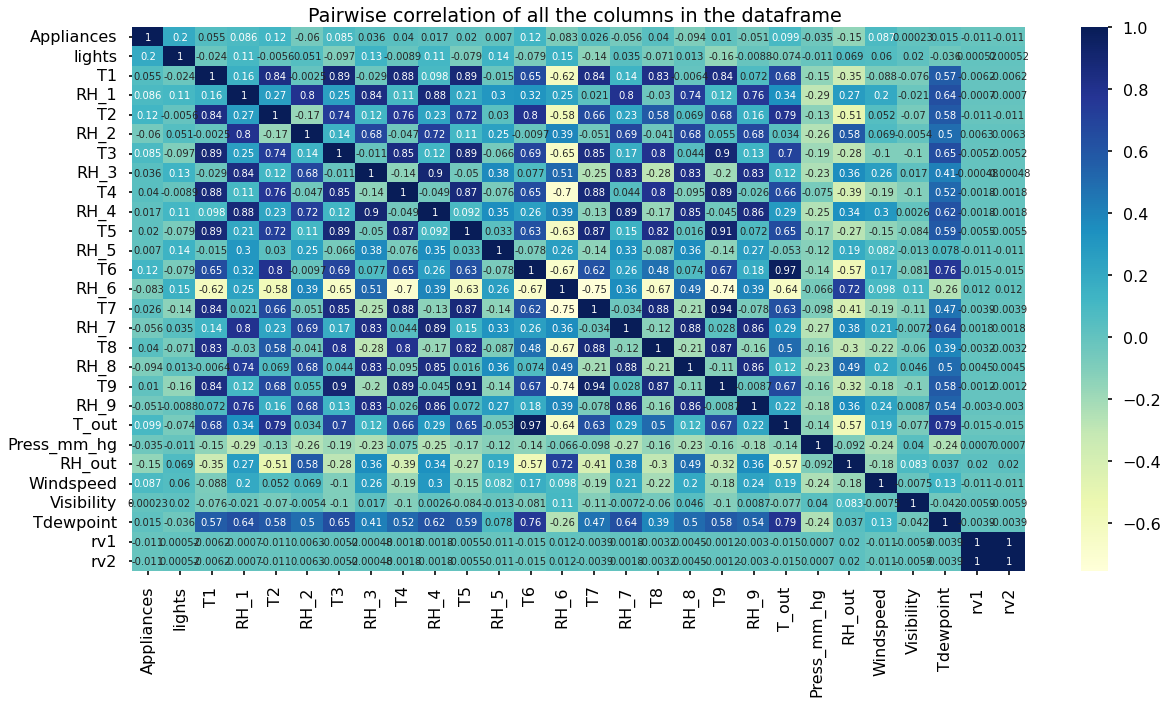

In [311]:
plt.figure(figsize = (20,10))
sns.heatmap(data= df.corr(), cmap="YlGnBu", annot= True)
plt.title("Pairwise correlation of all the columns in the dataframe ")
plt.show()

In [312]:
def ts_plot(
    df: pd.DataFrame, cols: list, nrows: int, ncols: int, labels: list, title: str
) -> None:
    """General function to plot temperature and humidity

    Args:
        df (pd.DataFrame): Dataframe
        cols (list): List of columns to plot
        nrows (int): Number of rows for subplot
        ncols (int): Number of columns for subplot
        labels (list): Labels of the plot
        title (str): Title of the plot
    """
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 8))
    ax = ax.flatten()

    for i, icol in enumerate(cols):
        sns.lineplot(data=df[icol], ax=ax[i], label=labels[i])

    plt.suptitle(title)
    plt.show()

In [313]:
labels = [
    "Kitchen",
    "Living Room",
    "Laundry Room",
    "Office",
    "Bathroom",
    "Outside of Building (North side)",
    "Ironing Room",
    "Teenager Room",
    "Parents Room",
]

In [314]:
# Divide the columns based on type for clear column management

col_temp = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"]

col_hum = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"]

col_weather = ["Press_mm_hg", "T_out", "RH_out", "Windspeed", "Visibility", "Tdewpoint"]

col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

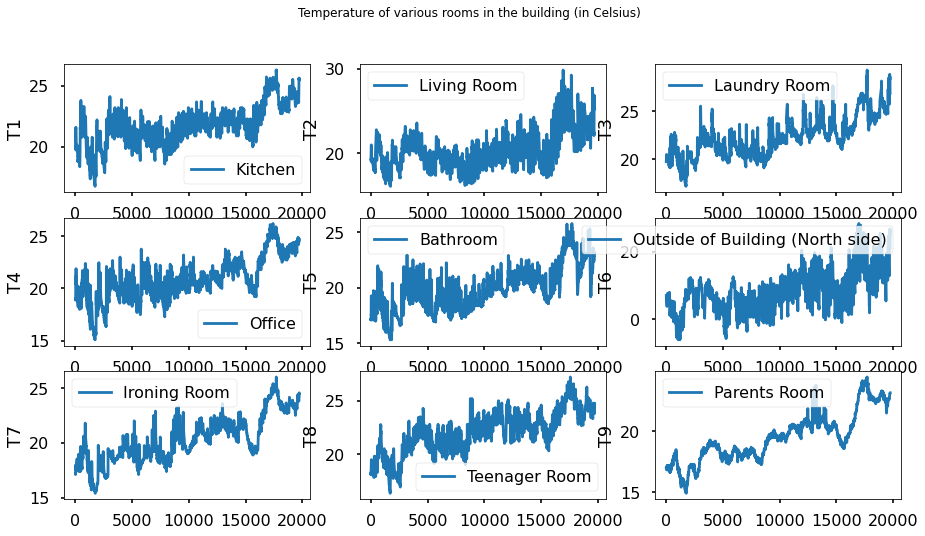

In [315]:
# Plot temperature features
ts_plot(
    df,
    col_temp,
    3,
    3,
    labels,
    title="Temperature of various rooms in the building (in Celsius)",
)

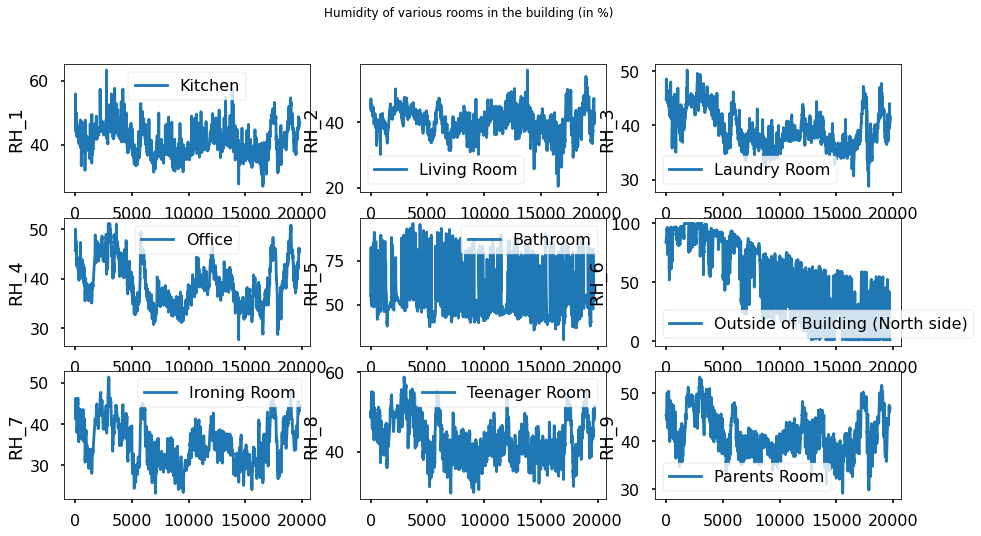

In [316]:
# Plot humidity features
ts_plot(
    df, col_hum, 3, 3, labels, title="Humidity of various rooms in the building (in %)"
)

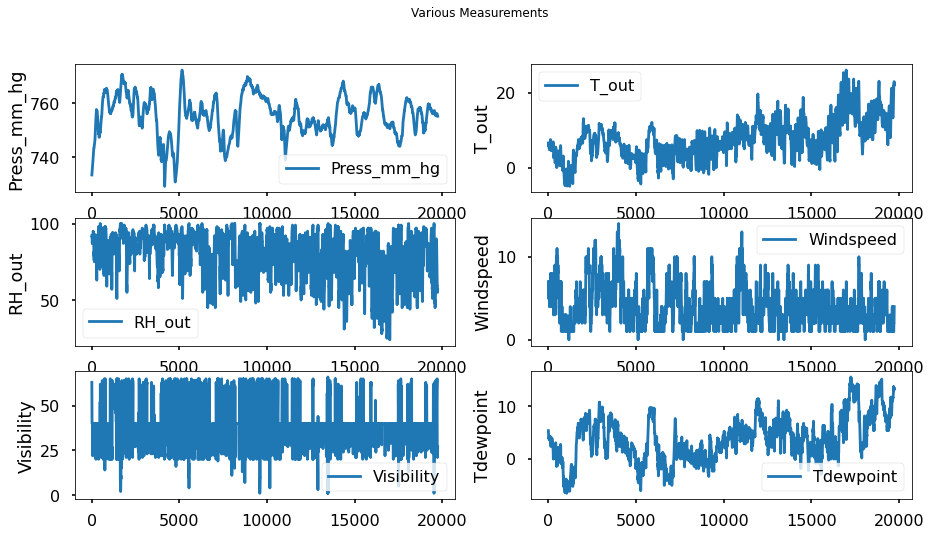

In [317]:
# Plot features other than temperature and humidity
ts_plot(df, col_weather, 3, 2, col_weather, title="Various Measurements")

# Data Pre Processing


In [318]:
# Spliting dataset into train and test
df_train, df_test = train_test_split(df, test_size=0.20, random_state=0)
print(df_train.shape, df_test.shape)

(15788, 29) (3947, 29)


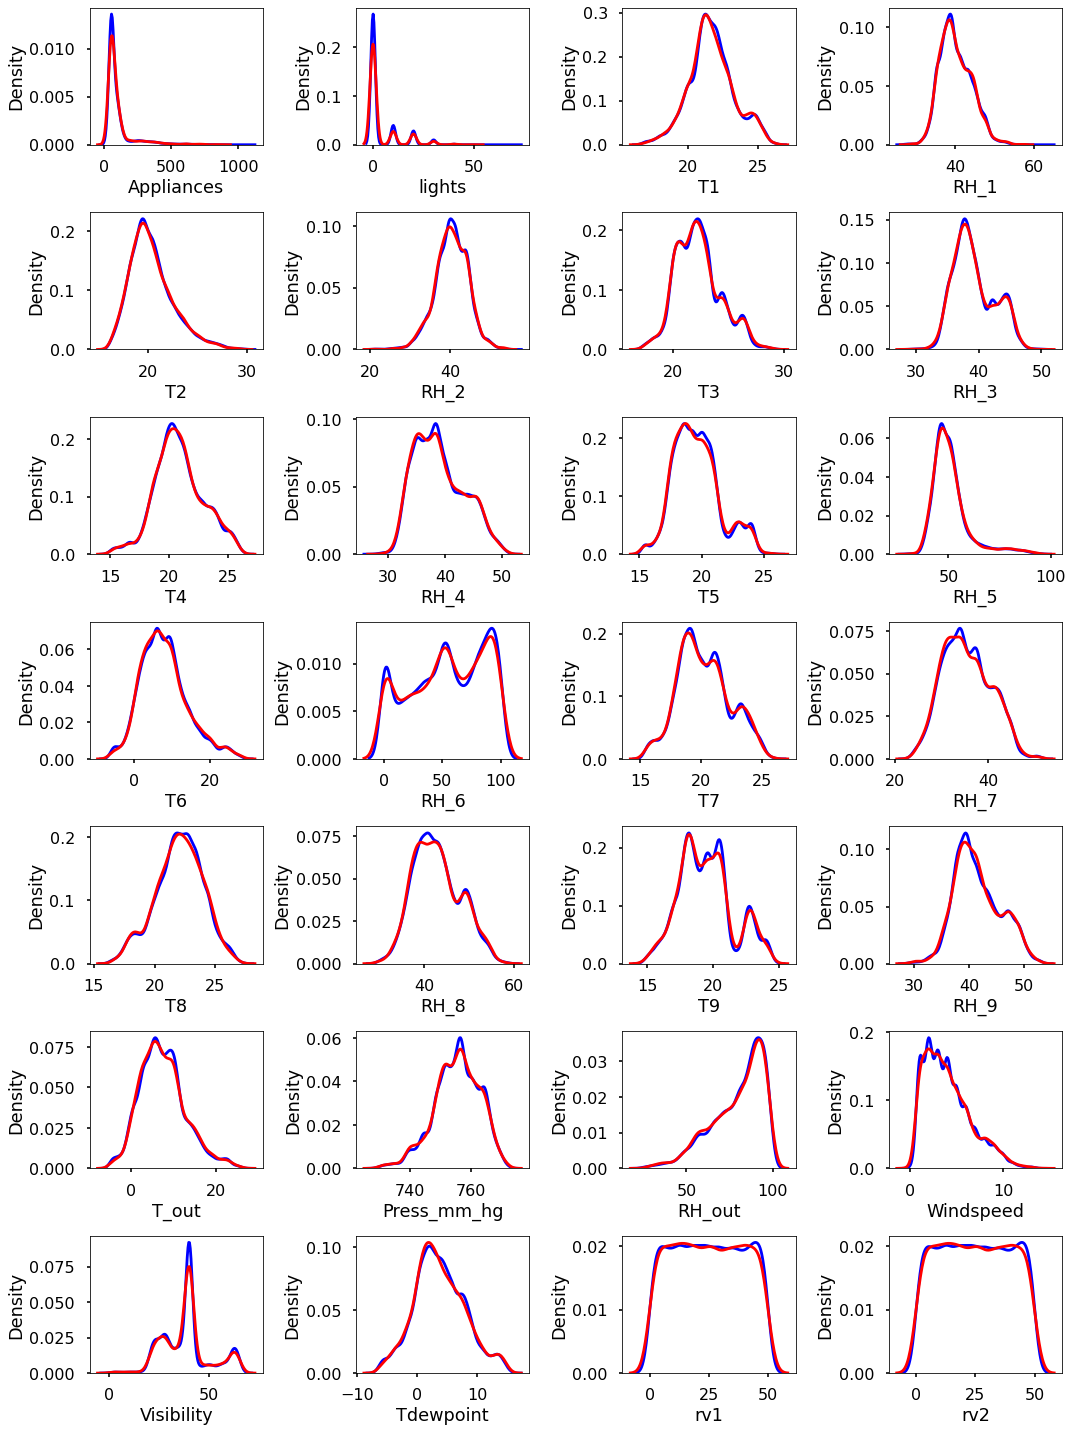

In [319]:
# Check for distribution of train and test data for all the features

fig, ax = plt.subplots(7, 4, figsize=(15, 20))
ax = ax.flatten()

for i, icol in enumerate(df_train.columns[1:]):
    sns.kdeplot(data=df_train, x=icol, color="b", ax=ax[i])
    sns.kdeplot(data=df_test, x=icol, color="r", ax=ax[i])

plt.tight_layout()
plt.show()

1. Temperature - All the columns follow normal distribution except T9
2. Humidity - All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house 
3. Appliance - This column is postively skewed , most the values are around mean 100 Wh . There are outliers in this column 
4. Visibilty - This column is negatively skewed
5. Windspeed - This column is postively skewed

In [320]:
df_train.lights.value_counts()

0     12167
10     1805
20     1294
30      455
40       58
50        7
60        1
70        1
Name: lights, dtype: int64

In [321]:
# Seperate features and target variable for both train and test data
drop_cols = ["Appliances", "rv1", "rv2", "date", "lights"]
X_train = df_train.drop(drop_cols, axis=1)
y_train = df_train["Appliances"]

X_test = df_test.drop(drop_cols, axis=1)
y_test = df_test["Appliances"]

print(f"Train data: {X_train.shape, y_train.shape}")
print(f"Test data: {X_test.shape, y_test.shape}")

Train data: ((15788, 24), (15788,))
Test data: ((3947, 24), (3947,))


In [322]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Create test and training set by including Appliances column
df_train = df_train[list(X_train.columns.values) + col_target]
df_test = df_test[list(X_test.columns.values) + col_target]

# Create dummy test and training set to hold scaled values
sc_train = pd.DataFrame(columns=df_train.columns, index=df_train.index)
sc_train[sc_train.columns] = scaler.fit_transform(df_train)

sc_test = pd.DataFrame(columns=df_test.columns, index=df_test.index)
sc_test[sc_test.columns] = scaler.fit_transform(df_test)

In [323]:
# Remove Appliances column from traininig set
X_train = sc_train.drop(["Appliances"], axis=1)
y_train = sc_train["Appliances"]

X_test = sc_test.drop(["Appliances"], axis=1)
y_test = sc_test["Appliances"]

# Model Implementation

**Linear regression models**

1. Lasso regression 

2. Ridge regression 

**Support Vector Machine**

3. Support vector regression 

**Nearest neighbour Regressor**

4. KNeighborsRegressor

**Ensemble models**

5. Random Forest Regressor

5. Gradient Boosting Regressor

7. ExtraTrees Regressor

8. Extreme Gradient Boosting with XGBoost

**Neural Network**

9. Multi Layer Preceptron Regressor

In [324]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
)
import xgboost as xgb
from sklearn.neural_network import MLPRegressor

from sklearn import neighbors
from sklearn.svm import SVR

In [325]:
models = [
    ["Lasso: ", Lasso()],
    ["Ridge: ", Ridge()],
    ["KNeighborsRegressor: ", neighbors.KNeighborsRegressor()],
    ["SVR:", SVR(kernel="rbf")],
    ["RandomForest ", RandomForestRegressor()],
    ["ExtraTreeRegressor :", ExtraTreesRegressor()],
    ["GradientBoostingClassifier: ", GradientBoostingRegressor()],
    ["XGBRegressor: ", xgb.XGBRegressor()],
    [
        "MLPRegressor: ",
        MLPRegressor(
            learning_rate="adaptive", max_iter=1000, learning_rate_init=0.01, alpha=0.01
        ),
    ],
]

In [326]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

model_data = []
for name, curr_model in models:
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train, y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = r2_score(y_train, curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test, curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(
        mean_squared_error(y_test, curr_model.predict(X_test))
    )
    model_data.append(curr_model_data)

[12:00:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [327]:
# Convert list to dataframe
result = pd.DataFrame(model_data)

In [328]:
result

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.0128,0.0000,0.0000,1.0000
1,Ridge:,0.0068,0.1489,0.1358,0.9296
2,KNeighborsRegressor:,0.0027,0.6949,0.4485,0.7426
3,SVR:,15.9812,0.2446,0.2073,0.8904
4,RandomForest,37.7574,0.9408,0.5216,0.6917
5,ExtraTreeRegressor :,9.6452,1.0000,0.6102,0.6243
6,GradientBoostingClassifier:,8.5731,0.3321,0.2284,0.8784
7,XGBRegressor:,1.7957,0.3291,0.2265,0.8795
8,MLPRegressor:,9.5320,0.4589,0.3067,0.8326


1. Best results over test set are given by Extra Tree Regressor
2. Least RMSE score is also by Extra Tree Regressor
3. Lasso regression was worst performing model


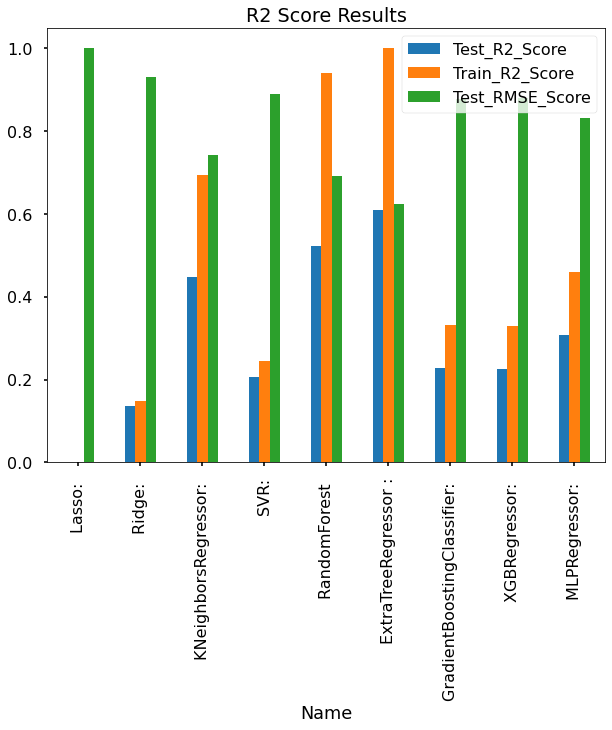

In [329]:
result.plot(
    x="Name",
    y=["Test_R2_Score", "Train_R2_Score", "Test_RMSE_Score"],
    kind="bar",
    title="R2 Score Results",
    figsize=(10, 8),
);

# Time Series Analysis
Since we are doing time series analysis, we first convert the date column to datetime datatype and set is as the index column

In [330]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [331]:
df=df[['date','Appliances']]
df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


In [332]:
df.timestamp = pd.to_datetime(df.date)

# Resampling to daily frequency
df.index = df.timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()
df.head()

,Appliances
date,
2016-01-11,136.6667
2016-01-12,85.6944
2016-01-13,97.0139
2016-01-14,151.3889
2016-01-15,125.3472


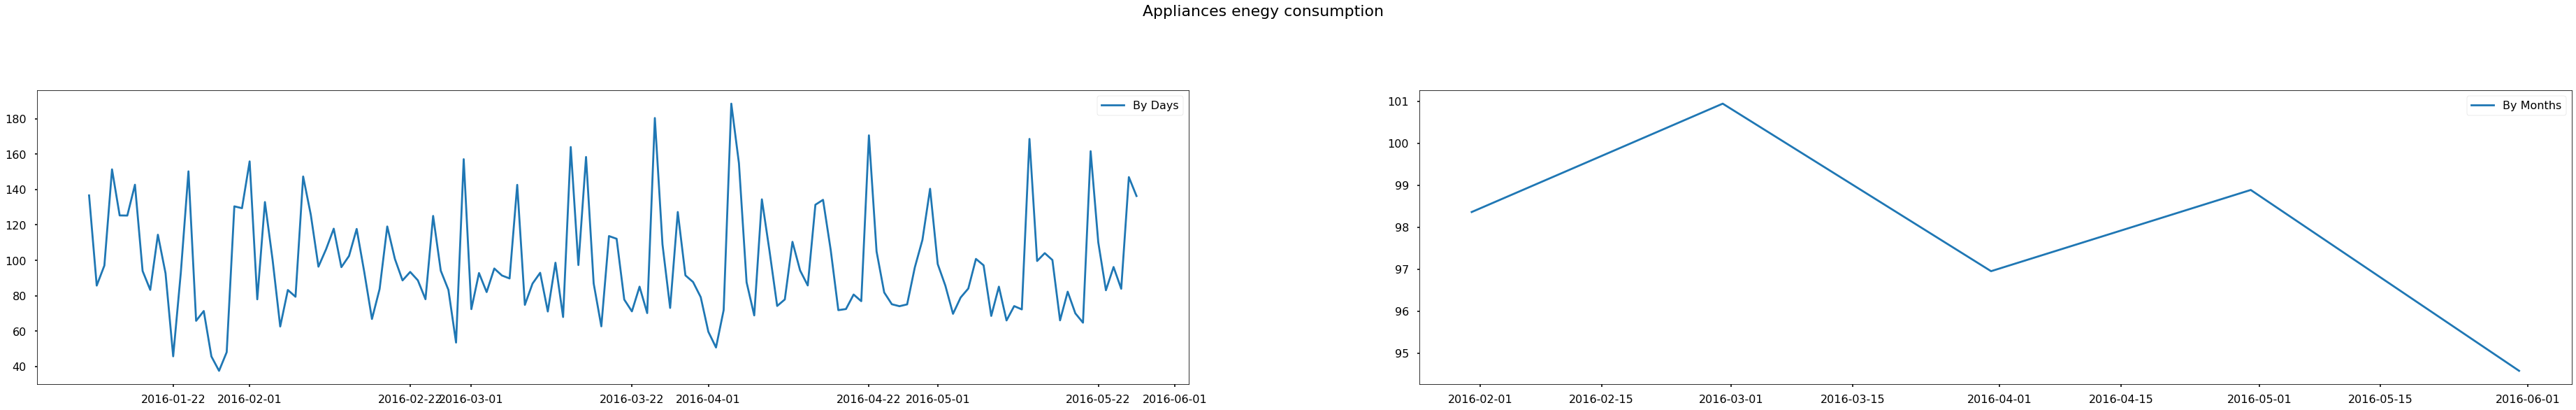

In [333]:
fig = plt.figure(figsize=[65, 17])
plt.suptitle('Appliances enegy consumption', fontsize=22)

plt.subplot(221)
plt.plot(df.Appliances, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Appliances, '-', label='By Months')
plt.legend()

In [334]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries.Appliances, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


test_stationarity(df)

Results of Dickey-Fuller Test:
Test Statistic                -7.2076e+00
p-value                        2.2792e-10
#Lags Used                     3.0000e+00
Number of Observations Used    1.3400e+02
Critical Value (1%)           -3.4801e+00
Critical Value (5%)           -2.8834e+00
Critical Value (10%)          -2.5784e+00
dtype: float64


The Dickey-Fuller test statistic value of -7.2 is less than the value of -3.4 at Crirical Vaue (1%).

This suggests that we can reject the null hypothesis with a significance level of less than 1%.

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

Since p-value<=0.05, we can reject the null hypothesis, the data does not have a unit root and is stationary.

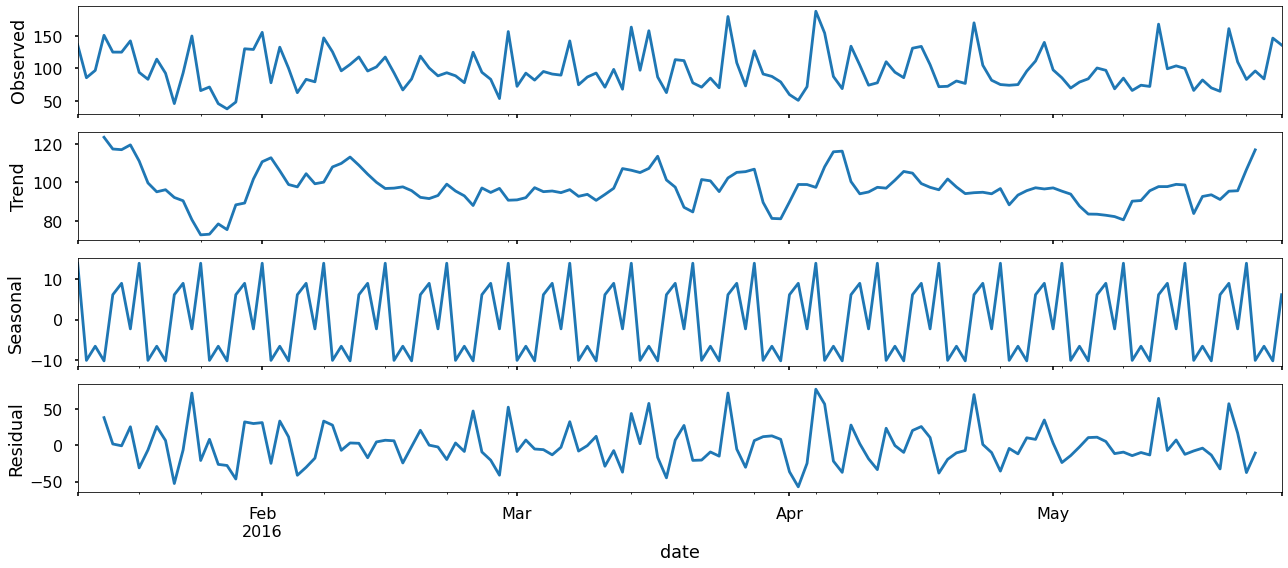

In [335]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df.Appliances, model='additive')
fig = decomposition.plot()
plt.show()

In [336]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [337]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.Appliances,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print(f'ARIMA{param}x{param_seasonal} - AIC:{results.aic}')
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1658.7532763969257
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1428.6726154055395
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:1313.1647659322539
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1106.981968049625
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1318.1457992688975
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1246.8123896152015
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:1152.4882411221831
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1108.948270335203
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1541.3587631153252
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1359.5348550786798
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1300.6379936358542
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1097.6124476468283
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1315.2894811471037
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1237.2447152347197
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:1154.3111338863175
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1099.5876717236674
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1393.4310643175713
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1273.777886397184
ARIMA(0, 1, 0)x(0, 1, 0, 12) - 

In [338]:
# fit the model

mod = sm.tsa.statespace.SARIMAX(df.Appliances,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         Appliances   No. Observations:                  138
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 12)   Log Likelihood                -605.399
Date:                            Thu, 21 Jul 2022   AIC                           1216.798
Time:                                    12:00:58   BIC                           1225.283
Sample:                                01-11-2016   HQIC                          1220.245
                                     - 05-27-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000    172.879     -0.006      0.995    -339.837     337.837
ar.S.L12      -0.1437      0.094   

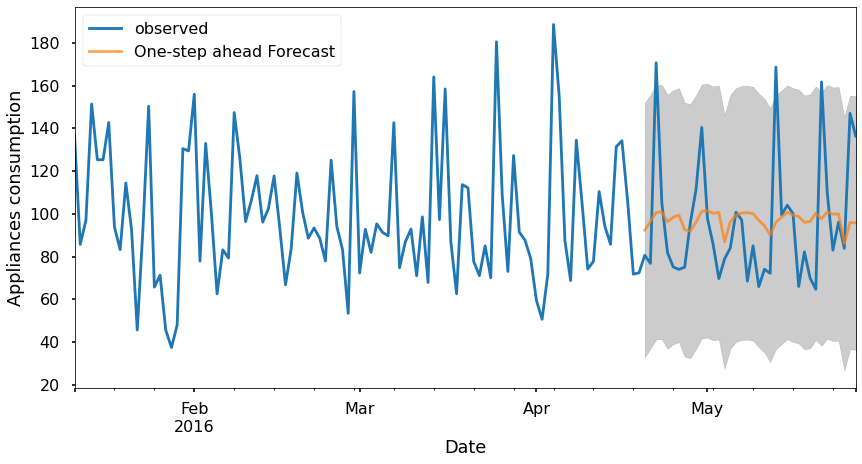

In [339]:
# prediction

pred = results.get_prediction(start=pd.to_datetime('2016-04-20'), dynamic=False)
pred_ci = pred.conf_int()

ax = df.Appliances['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Appliances consumption')
plt.legend()

plt.show()

In [340]:
y_forecasted = pred.predicted_mean
y_truth = df.Appliances['2016-04-20':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 803.0
The Root Mean Squared Error of our forecasts is 28.34


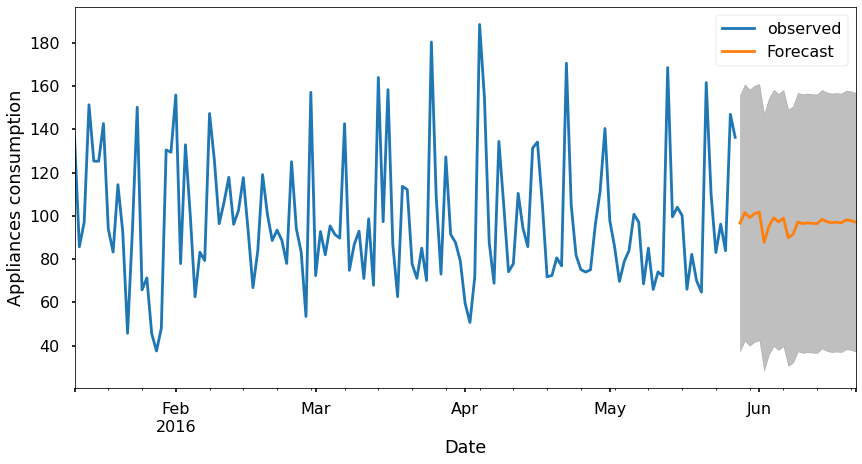

In [341]:
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()

ax = df.Appliances.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Appliances consumption')

plt.legend()
plt.show()